In [2]:
import shap
import joblib
import pandas as pd
import numpy as np

pipeline = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\no_bootstrap\rf_model.pkl')
scaler_x = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\no_bootstrap\scaler_x.pkl')
scaler_y = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\no_bootstrap\scaler_y.pkl')
X_test = pd.read_csv(r"X_test.csv")
X_train = pd.read_csv(r"X_train.csv")
y_train = pd.read_csv(r"y_train.csv")
y_test = pd.read_csv(r"y_test.csv")
y_test_org = scaler_y.inverse_transform(y_test)
y_train_org = scaler_y.inverse_transform(y_train)
preds = pipeline.predict(X_test)
preds_org = scaler_y.inverse_transform(preds.reshape(-1,1))
# Calculate absolute errors
errors = np.abs(y_test_org - preds_org)

# Find indices of the worst predictions
worst_predictions_indices = np.argsort(errors, axis=0)[-5:]
best_predictions_indices = np.argsort(errors, axis=0)[:5]

# Display the worst predictions along with the original and predicted values
worst_predictions = [(index[0], y_test_org[index][0], preds_org[index][0], errors[index][0]) for index in worst_predictions_indices]
best_predictions = [(index[0], y_test_org[index][0], preds_org[index][0], errors[index][0]) for index in best_predictions_indices]

# Print the results
print("Worst predictions (index, actual, predicted, error):")
for index, actual, predicted, error in worst_predictions:
    print(f"Index: {index}, Actual: {actual}, Predicted: {predicted}, Error: {error}")

print("\nBest predictions (index, actual, predicted, error):")
for index, actual, predicted, error in best_predictions:
    print(f"Index: {index}, Actual: {actual}, Predicted: {predicted}, Error: {error}")

Worst predictions (index, actual, predicted, error):
Index: 166, Actual: [0.27590159], Predicted: [0.17164232], Error: [0.10425927]
Index: 98, Actual: [0.15414315], Predicted: [0.26158607], Error: [0.10744293]
Index: 165, Actual: [0.28384602], Predicted: [0.17164232], Error: [0.11220369]
Index: 116, Actual: [0.36435376], Predicted: [0.23712172], Error: [0.12723204]
Index: 117, Actual: [0.37222416], Predicted: [0.23712172], Error: [0.13510244]

Best predictions (index, actual, predicted, error):
Index: 119, Actual: [0.139335], Predicted: [0.1393633], Error: [2.83047478e-05]
Index: 155, Actual: [0.137056], Predicted: [0.13709712], Error: [4.11243265e-05]
Index: 21, Actual: [0.096], Predicted: [0.09609429], Error: [9.42856608e-05]
Index: 110, Actual: [0.41379088], Predicted: [0.41366827], Error: [0.00012261]
Index: 140, Actual: [0.086], Predicted: [0.08583878], Error: [0.00016122]


In [3]:
# Extract the polynomial features transformer and the actual model from the pipeline
poly_features = pipeline.named_steps['t']
model = pipeline.named_steps['m'] 


In [4]:
poly_features.get_feature_names_out()


array(['1', 'IC2', 'AMW', 'H%', 'SHED_NL', 'JGT', 'B04[O-O]', 'H-052',
       'MaxsOH', 'Xindex', 'B03[C-C]', 's4_relPathLength_2', 'P_VSA_MR_7',
       'chiralPhMoment', 'CATS2D_02_AN', 'SHED_AN', 's34_phRelSize',
       'steel type', 'IC2^2', 'IC2 AMW', 'IC2 H%', 'IC2 SHED_NL',
       'IC2 JGT', 'IC2 B04[O-O]', 'IC2 H-052', 'IC2 MaxsOH', 'IC2 Xindex',
       'IC2 B03[C-C]', 'IC2 s4_relPathLength_2', 'IC2 P_VSA_MR_7',
       'IC2 chiralPhMoment', 'IC2 CATS2D_02_AN', 'IC2 SHED_AN',
       'IC2 s34_phRelSize', 'IC2 steel type', 'AMW^2', 'AMW H%',
       'AMW SHED_NL', 'AMW JGT', 'AMW B04[O-O]', 'AMW H-052',
       'AMW MaxsOH', 'AMW Xindex', 'AMW B03[C-C]',
       'AMW s4_relPathLength_2', 'AMW P_VSA_MR_7', 'AMW chiralPhMoment',
       'AMW CATS2D_02_AN', 'AMW SHED_AN', 'AMW s34_phRelSize',
       'AMW steel type', 'H%^2', 'H% SHED_NL', 'H% JGT', 'H% B04[O-O]',
       'H% H-052', 'H% MaxsOH', 'H% Xindex', 'H% B03[C-C]',
       'H% s4_relPathLength_2', 'H% P_VSA_MR_7', 'H% chiralPhMoment

In [5]:
feature_names = pd.read_csv(r"feature_names.csv").to_numpy().reshape(-1)
feature_names

array(['IC2', 'AMW', 'H%', 'SHED_NL', 'JGT', 'B04[O-O]', 'H-052',
       'MaxsOH', 'Xindex', 'B03[C-C]', 's4_relPathLength_2', 'P_VSA_MR_7',
       'chiralPhMoment', 'CATS2D_02_AN', 'SHED_AN', 's34_phRelSize',
       'steel type'], dtype=object)

In [6]:
group_id_train = pd.read_csv(r"GroupID_train.csv")
group_id_test = pd.read_csv(r"GroupID_test.csv")
tot_group_id = pd.concat([group_id_train, group_id_test])
# Get index where group ID equals 104
index = group_id_train.index[group_id_train['Group ID'] == 104].tolist()
print(index)
for idx in index:
    p = pipeline.predict(X_train.iloc[idx].to_numpy().reshape(1, -1))
    p=scaler_y.inverse_transform(p.reshape(-1,1))
    print(f"Predicted: {p}, Actual: {y_train_org[idx]}, Error: {np.abs(p[0] - y_train_org[idx])}")

# Get index where group ID equals 104
index = group_id_test.index[group_id_test['Group ID'] == 105].tolist()
print(index)
for idx in index:
    p = pipeline.predict(X_test.iloc[idx].to_numpy().reshape(1, -1))
    p=scaler_y.inverse_transform(p.reshape(-1,1))
    print(f"Predicted: {p}, Actual: {y_test_org[idx]}, Error: {np.abs(p[0] - y_test_org[idx])}")

[55, 56]
Predicted: [[0.35233902]], Actual: [0.3444219], Error: [0.00791712]
Predicted: [[0.35233902]], Actual: [0.36727636], Error: [0.01493735]
[98, 99]
Predicted: [[0.26158607]], Actual: [0.15414315], Error: [0.10744293]
Predicted: [[0.26158607]], Actual: [0.17660759], Error: [0.08497848]


c:\Users\58061\AppData\Local\anaconda3\envs\machinelearning2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\58061\AppData\Local\anaconda3\envs\machinelearning2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\58061\AppData\Local\anaconda3\envs\machinelearning2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\58061\AppData\Local\anaconda3\envs\machinelearning2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [7]:
total_X = pd.concat([X_train, X_test])

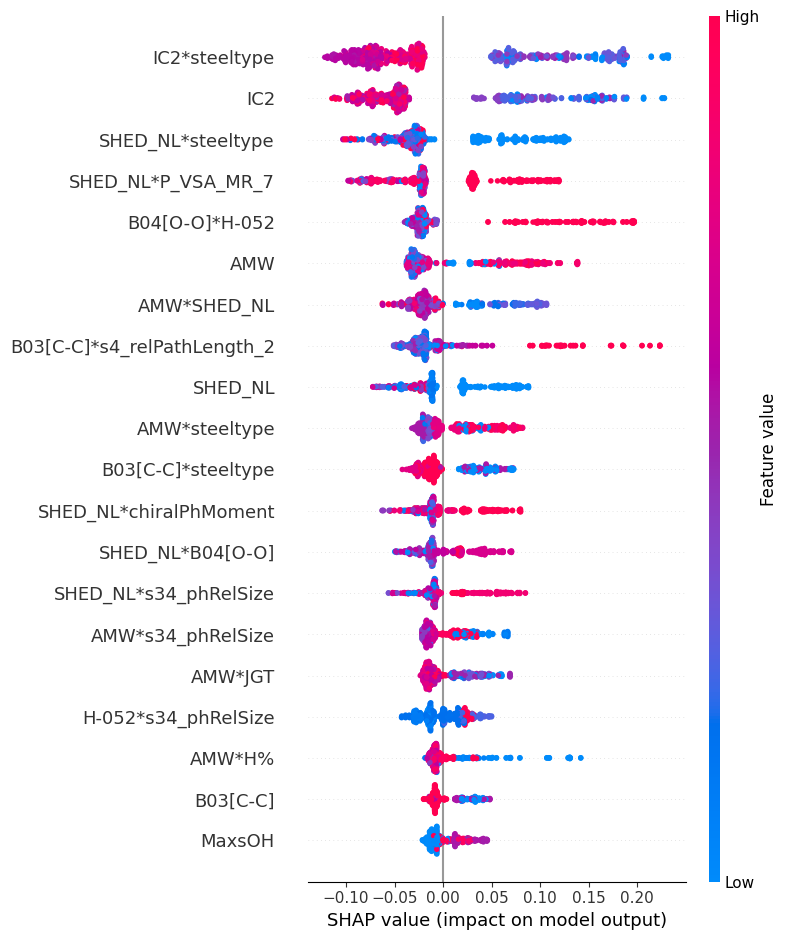

In [15]:
import os
import joblib
import matplotlib.pyplot as plt
import shap
path = r'C:\Users\58061\Documents\school\Master\Final\Models2\no_bootstrap'
scaler_x = joblib.load(os.path.join(path, 'scaler_x.pkl'))
scaler_y = joblib.load(os.path.join(path, 'scaler_y.pkl'))
pipeline = joblib.load(os.path.join(path, 'rf_model.pkl'))

# Extract the polynomial features transformer and the actual model from the pipeline
poly_features = pipeline.named_steps['t']
model = pipeline.named_steps['m'] 
# Get the feature names
feature_names = poly_features.get_feature_names_out()
feature_names = [
    name.replace('steel type', 'steeltype').replace(' ', '*') 
    if 'steel type' in name else name.replace(' ', '*') 
    for name in feature_names
]
# Transform the data
poly_X = poly_features.transform(total_X)
# Plot global feature importance of the model

# Plot feature Importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(poly_X)
shap.initjs()
shap.summary_plot(shap_values, poly_X, feature_names=feature_names, max_display=20, show=False)
plt.savefig('shap.png')
plt.show()

            

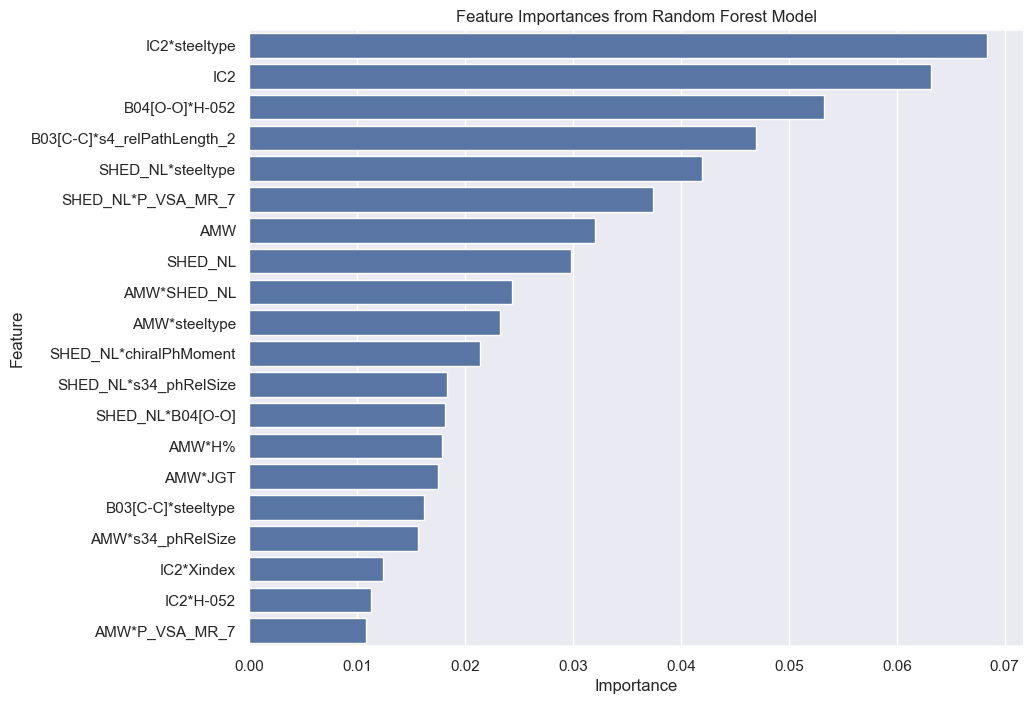

In [30]:
import seaborn as sns
# Sort feature importances and select the top 2
sorted_indices = np.argsort(model.feature_importances_)[::-1]
top_indices = sorted_indices[:20]

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': [feature_names[i] for i in top_indices], 
                              'Importance': model.feature_importances_[top_indices]})

# Plot the feature importances using seaborn
plt.figure(figsize=(10, 8))
sns.set_theme(color_codes=True)
sns.barplot(x='Importance', y='Feature', data=importance_df, color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')
plt.show()

In [209]:
X_train.shape, X_test.shape, total_X.shape, tot_group_id.shape

((402, 17), (173, 17), (575, 17), (575, 1))

In [210]:
# print index of goup id equals 136
index = group_id_test.index[group_id_test['Group ID'] == 105].tolist()
print(index)

[98, 99]


In [211]:
pao201c12 = X_test.iloc[98]
pao205c12 = X_train.iloc[356]
pao2 = X_train.iloc[55]

s=0
for _ in range(1000):
    s += (total_X.iloc[np.random.randint(0, total_X.shape[0]), :] - total_X.iloc[np.random.randint(0, total_X.shape[0]), :]).abs().sum()
s=s/1000

diff1 = (pao201c12 - pao205c12).abs().sum()
diff2 = (pao2 - pao201c12).abs().sum()
print(f"Difference between pao2-01-c12 and pao2-05-c12:\t {diff1} \nDifference between pao2 and pao2-01-c12: \t {diff2} \nAverage difference between two random samples: \t {s}")

Difference between pao2-01-c12 and pao2-05-c12:	 1.3667245975443951 
Difference between pao2 and pao2-01-c12: 	 0.3416811493860983 
Average difference between two random samples: 	 15.686548264561326


c:\Users\58061\AppData\Local\anaconda3\envs\machinelearning2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


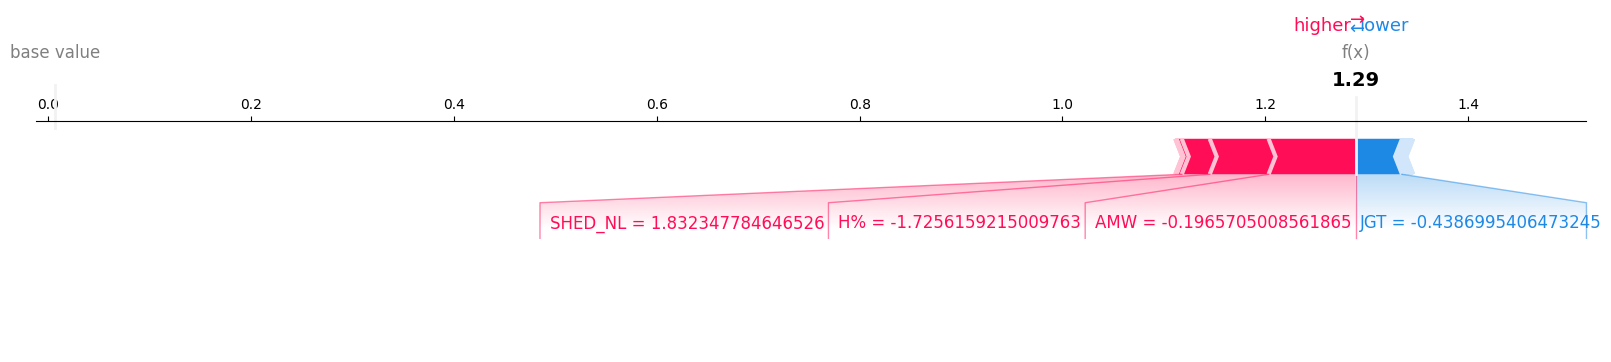

<Figure size 640x480 with 0 Axes>

In [223]:
import matplotlib.pyplot as plt
# Perform SHAP analysis for the bad prediction at index 98
bad_index = 98
instance = X_test.iloc[bad_index, :].to_numpy().reshape(1, -1)

# Transform the instance with polynomial features
transformed_bad_instance = poly_features.transform(instance)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(transformed_bad_instance)

# Plot SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, transformed_bad_instance, feature_names=X_test.columns, matplotlib=True)
plt.savefig('shap_pao2_01_c12.png')

c:\Users\58061\AppData\Local\anaconda3\envs\machinelearning2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


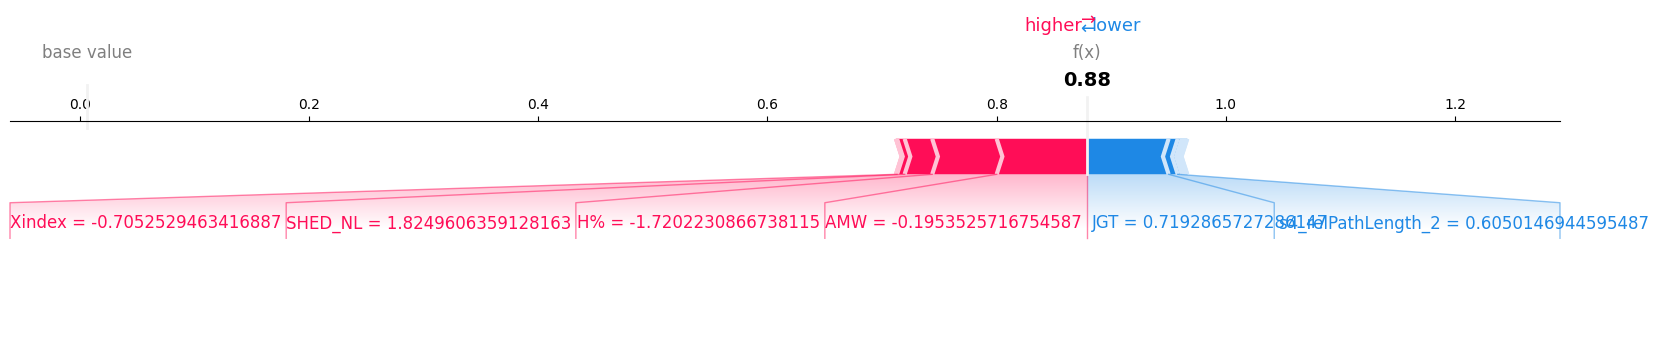

In [224]:
good_index = 356
instance = X_train.iloc[good_index].to_numpy().reshape(1, -1)

# Transform the instance with polynomial features
transformed_bad_instance = poly_features.transform(instance)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(transformed_bad_instance)

# Plot SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, transformed_bad_instance, feature_names=X_train.columns, matplotlib=True)


In [222]:
good_index = 55
instance = X_train.iloc[good_index].to_numpy().reshape(1, -1)

# Transform the instance with polynomial features
transformed_bad_instance = poly_features.transform(instance)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(transformed_bad_instance)

# Plot SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, transformed_bad_instance, feature_names=X_train.columns)

c:\Users\58061\AppData\Local\anaconda3\envs\machinelearning2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [7]:
good_index = 3
# Perform SHAP analysis for the good prediction at index 3
instance = X_test[good_index].reshape(1, -1)

# Transform the instance with polynomial features
transformed_good_instance = poly_features.transform(instance)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(transformed_good_instance)

# Plot SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, transformed_good_instance, feature_names=feature_names)

Worst predictions (index, actual, predicted, error):
Index: 147, Actual: [0.29245115], Predicted: [0.21392806], Error: [0.07852309]
Index: 165, Actual: [0.28384602], Predicted: [0.20473798], Error: [0.07910804]
Index: 42, Actual: [0.125], Predicted: [0.20524104], Error: [0.08024104]
Index: 41, Actual: [0.119], Predicted: [0.20524104], Error: [0.08624104]
Index: 99, Actual: [0.17660759], Predicted: [0.28325136], Error: [0.10664377]
Index: 116, Actual: [0.36435376], Predicted: [0.25069653], Error: [0.11365723]
Index: 172, Actual: [0.31165689], Predicted: [0.42868802], Error: [0.11703113]
Index: 117, Actual: [0.37222416], Predicted: [0.25069653], Error: [0.12152763]
Index: 171, Actual: [0.30461153], Predicted: [0.42868802], Error: [0.12407649]
Index: 98, Actual: [0.15414315], Predicted: [0.28325136], Error: [0.12910822]


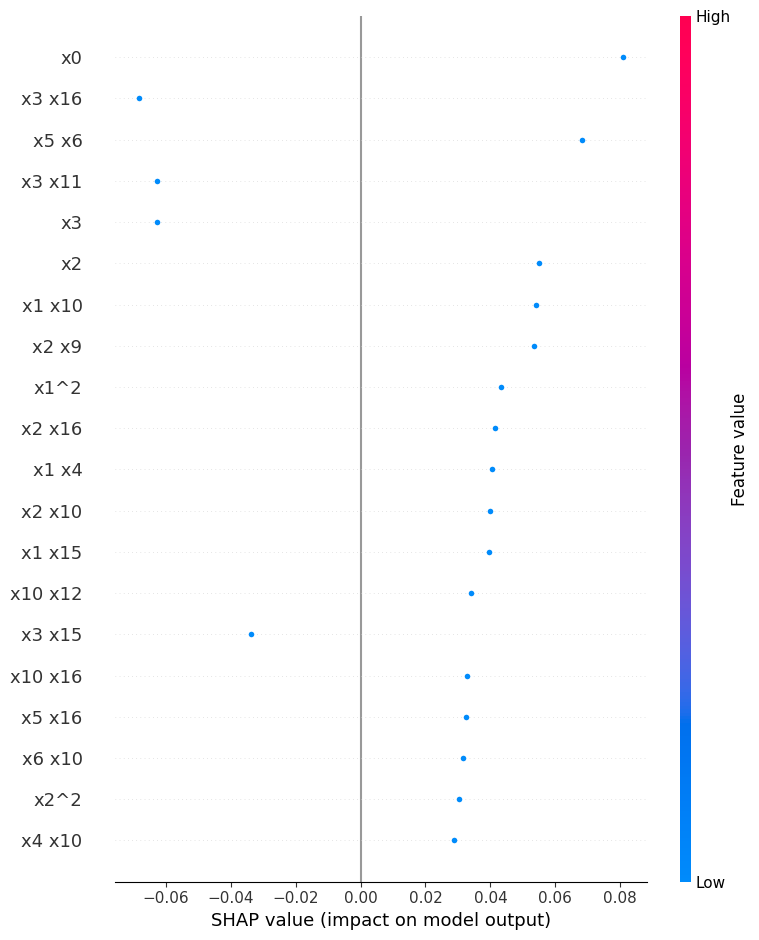

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [19]:
import shap
import joblib
import pandas as pd
import numpy as np

# Load model and scalers
pipeline = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\norm_bootstrap\rf_model.pkl')
scaler_x = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\norm_bootstrap\scaler_x.pkl')
scaler_y = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\norm_bootstrap\scaler_y.pkl')

# Load test data
X_test = pd.read_csv(r"X_test.csv").to_numpy()
y_test = pd.read_csv(r"y_test.csv").to_numpy()
feature_names = pd.read_csv(r"feature_names.csv").to_numpy().reshape(-1)

# Inverse transform to get original scale values
y_test_org = scaler_y.inverse_transform(y_test)

# Make predictions and inverse transform
preds = pipeline.predict(X_test)
preds_org = scaler_y.inverse_transform(preds.reshape(-1, 1))

# Calculate absolute errors
errors = np.abs(y_test_org - preds_org)

# Find indices of the worst predictions
worst_predictions_indices = np.argsort(errors, axis=0)[-10:]

# Display the worst predictions along with the original and predicted values
worst_predictions = [(index[0], y_test_org[index][0], preds_org[index][0], errors[index][0]) for index in worst_predictions_indices]

# Print the results
print("Worst predictions (index, actual, predicted, error):")
for index, actual, predicted, error in worst_predictions:
    print(f"Index: {index}, Actual: {actual}, Predicted: {predicted}, Error: {error}")

# Extract the polynomial features transformer and the actual model from the pipeline
poly_features = pipeline.named_steps['t']
model = pipeline.named_steps['m']  # replace 'randomforestregressor' with the name of your model step

# Perform SHAP analysis for the worst prediction at index 98
bad_index = 98
good_index = 3

bad_instance = X_test[bad_index].reshape(1, -1)
good_instance = X_test[good_index].reshape(1, -1)

# Transform the instance with polynomial features
transformed_bad_instance = poly_features.transform(bad_instance)
transformed_good_instance = poly_features.transform(good_instance)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values_bad = explainer.shap_values(transformed_bad_instance)
shap_values_good = explainer.shap_values(transformed_good_instance)

# Plot SHAP values
shap.initjs()

# Summary Plot
shap.summary_plot(shap_values_bad, transformed_bad_instance, feature_names=poly_features.get_feature_names_out())

# Dependence Plot for important features
# important_features = ['feature1', 'feature2']  # replace with actual feature names
# for feature in important_features:
    # shap.dependence_plot(feature, shap_values_bad, transformed_bad_instance, feature_names=poly_features.get_feature_names_out())

# Force Plot for bad prediction
shap.force_plot(explainer.expected_value, shap_values_bad, transformed_bad_instance, feature_names=poly_features.get_feature_names_out())

# Force Plot for good prediction
shap.force_plot(explainer.expected_value, shap_values_good, transformed_good_instance, feature_names=poly_features.get_feature_names_out())

# Feature Importance Plot
shap.summary_plot(shap_values_bad, X_test, plot_type="bar", feature_names=poly_features.get_feature_names_out())

# Waterfall Plot for bad prediction
shap.waterfall_plot(shap.Explanation(values=shap_values_bad, base_values=explainer.expected_value, data=transformed_bad_instance, feature_names=poly_features.get_feature_names_out()))

# Waterfall Plot for good prediction
shap.waterfall_plot(shap.Explanation(values=shap_values_good, base_values=explainer.expected_value, data=transformed_good_instance, feature_names=poly_features.get_feature_names_out()))


Worst predictions (index, actual, predicted, error):
Index: 147, Actual: [0.29245115], Predicted: [0.21392806], Error: [0.07852309]
Index: 165, Actual: [0.28384602], Predicted: [0.20473798], Error: [0.07910804]
Index: 42, Actual: [0.125], Predicted: [0.20524104], Error: [0.08024104]
Index: 41, Actual: [0.119], Predicted: [0.20524104], Error: [0.08624104]
Index: 99, Actual: [0.17660759], Predicted: [0.28325136], Error: [0.10664377]
Index: 116, Actual: [0.36435376], Predicted: [0.25069653], Error: [0.11365723]
Index: 172, Actual: [0.31165689], Predicted: [0.42868802], Error: [0.11703113]
Index: 117, Actual: [0.37222416], Predicted: [0.25069653], Error: [0.12152763]
Index: 171, Actual: [0.30461153], Predicted: [0.42868802], Error: [0.12407649]
Index: 98, Actual: [0.15414315], Predicted: [0.28325136], Error: [0.12910822]
['IC2', 'AMW', 'H%', 'SHED_NL', 'JGT', 'B04[O-O]', 'H-052', 'MaxsOH', 'Xindex', 'B03[C-C]', 's4_relPathLength_2', 'P_VSA_MR_7', 'chiralPhMoment', 'CATS2D_02_AN', 'SHED_AN'

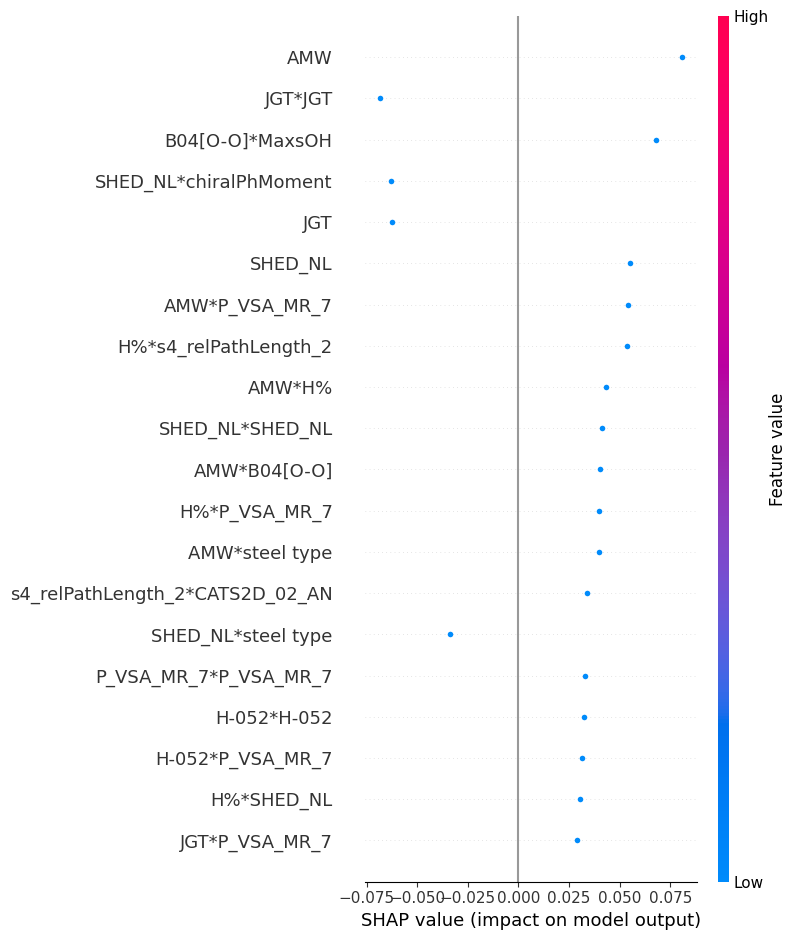

In [25]:
import shap
import joblib
import pandas as pd
import numpy as np
from itertools import combinations_with_replacement

# Load model and scalers
pipeline = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\norm_bootstrap\rf_model.pkl')
scaler_x = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\norm_bootstrap\scaler_x.pkl')
scaler_y = joblib.load(r'C:\Users\58061\Documents\school\Master\Final\Models2\norm_bootstrap\scaler_y.pkl')

# Load test data
# Load test data
X_test = pd.read_csv(r"X_test.csv").to_numpy()
y_test = pd.read_csv(r"y_test.csv").to_numpy()
feature_names = pd.read_csv(r"feature_names.csv").to_numpy().reshape(-1)

# Inverse transform to get original scale values
y_test_org = scaler_y.inverse_transform(y_test)

# Make predictions and inverse transform
preds = pipeline.predict(X_test)
preds_org = scaler_y.inverse_transform(preds.reshape(-1, 1))

# Calculate absolute errors
errors = np.abs(y_test_org - preds_org)

# Find indices of the worst predictions
worst_predictions_indices = np.argsort(errors, axis=0)[-10:]

# Display the worst predictions along with the original and predicted values
worst_predictions = [(index[0], y_test_org[index][0], preds_org[index][0], errors[index][0]) for index in worst_predictions_indices]

# Print the results
print("Worst predictions (index, actual, predicted, error):")
for index, actual, predicted, error in worst_predictions:
    print(f"Index: {index}, Actual: {actual}, Predicted: {predicted}, Error: {error}")

# Extract the polynomial features transformer and the actual model from the pipeline
poly_features = pipeline.named_steps['t']
model = pipeline.named_steps['m']  

# Create feature names for the polynomial features
def create_poly_feature_names(original_feature_names, poly_degree):
    poly_feature_names = original_feature_names.copy()
    for degree in range(2, poly_degree + 1):
        for comb in combinations_with_replacement(original_feature_names, degree):
            poly_feature_names.append('*'.join(comb))
    return poly_feature_names

# Generate the new feature names
poly_feature_names = create_poly_feature_names(list(feature_names), poly_features.degree)

# Print the polynomial feature names to identify actual feature names
print(poly_feature_names)

# Perform SHAP analysis for the worst prediction at index 98
bad_index = 98
good_index = 3

bad_instance = X_test[bad_index].reshape(1, -1)
good_instance = X_test[good_index].reshape(1, -1)

# Transform the instance with polynomial features
transformed_bad_instance = poly_features.transform(bad_instance)
transformed_good_instance = poly_features.transform(good_instance)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values_bad = explainer.shap_values(transformed_bad_instance)
shap_values_good = explainer.shap_values(transformed_good_instance)

# Plot SHAP values
shap.initjs()

# Summary Plot
shap.summary_plot(shap_values_bad, transformed_bad_instance, feature_names=poly_feature_names)





In [30]:
len(poly_feature_names)

170

In [26]:
# Force Plot for bad prediction
shap.force_plot(explainer.expected_value, shap_values_bad, transformed_bad_instance, feature_names=poly_feature_names)



In [27]:
# Force Plot for good prediction
shap.force_plot(explainer.expected_value, shap_values_good, transformed_good_instance, feature_names=poly_feature_names)



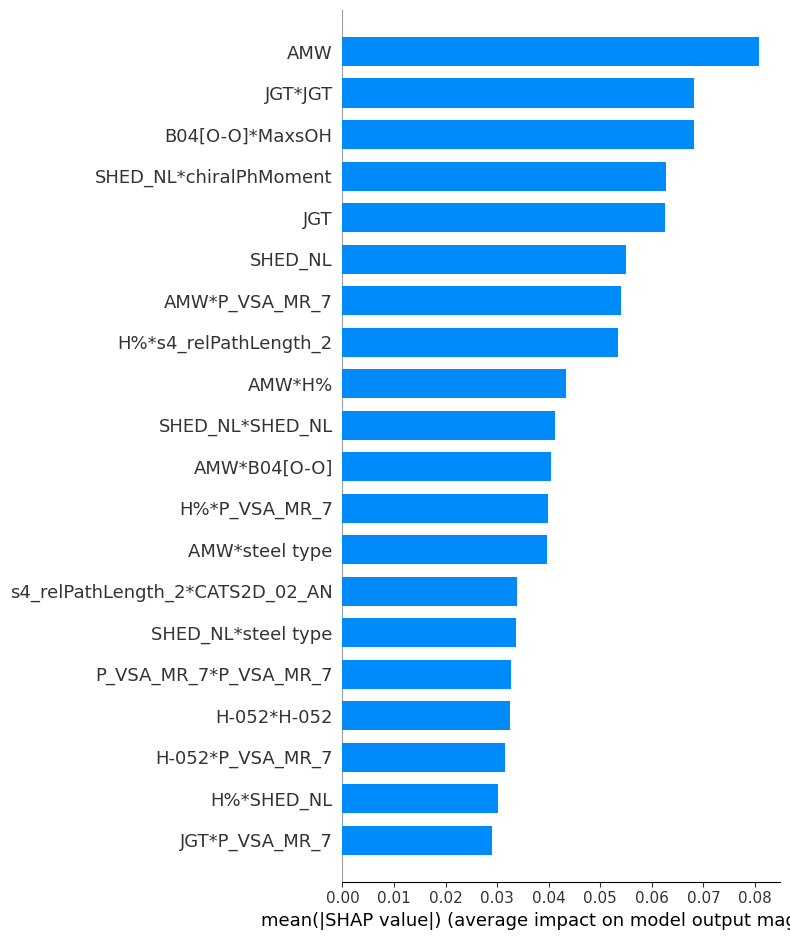

In [28]:
# Feature Importance Plot
shap.summary_plot(shap_values_bad, transformed_bad_instance, plot_type="bar", feature_names=poly_feature_names)